<B span  style="color: red; font-size: 40px;" >Pipeline of Project</span>

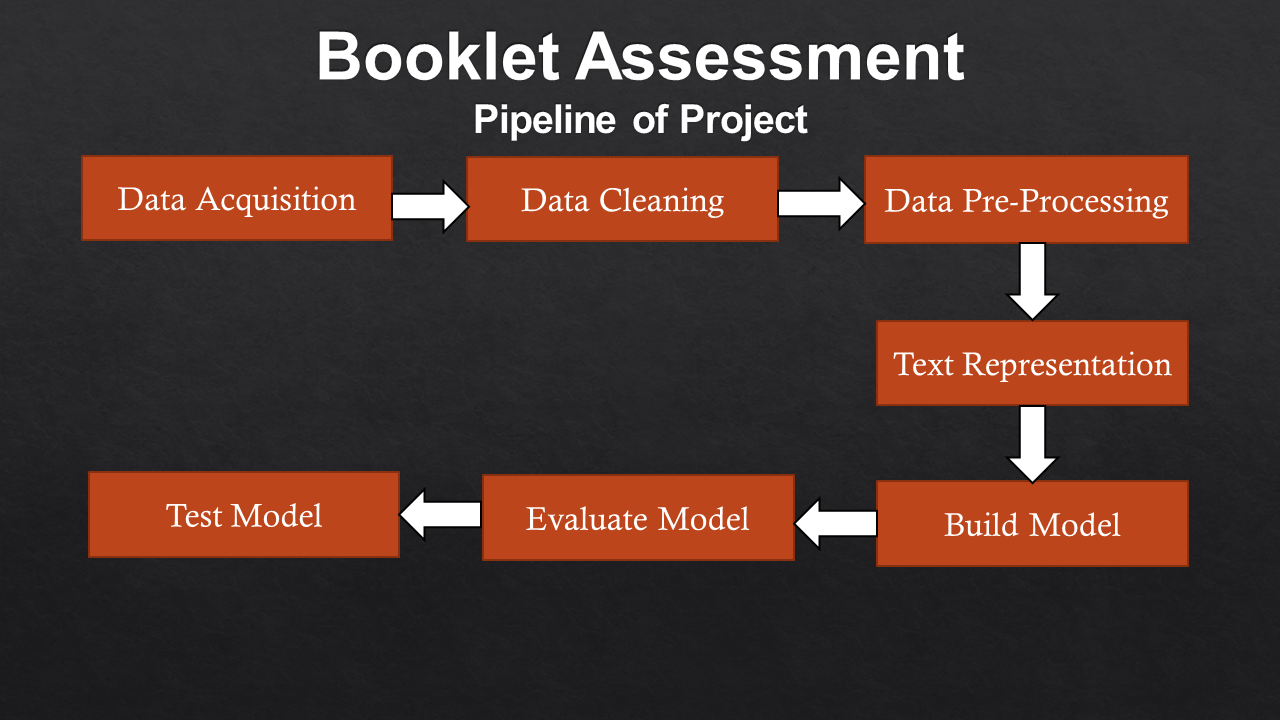

<B span style="color: red; font-size: 30px;" >Import Libraries</span>

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string 
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

<B span style="color: red; font-size: 30px;" >Load Data</span>

In [2]:
# read csv file into pandas
df = pd.read_csv("stu-answers.csv")
df.head(10)

,id_question,stu_answer,grade
0,18,ز,0
1,18,جبرائيل,1
2,18,جبريل,2
3,18,جبريل عليه السلام,2
4,18,سيدنا جبريل عليه السلام,2
5,18,جبريل عليه السلام\n,2
6,18,إسم الملك الذي جاء بالوحي إلى رسول الله صلى ال...,2
7,18,جبريل عليه السلام,2
8,18,جبريل عليه السلام,2
9,18,جبريل,2


<B span style="color: red; font-size: 30px;" >EDA</span>

<B span style="color: purple; font-size: 20px;" >Check Size of Data</span>

In [3]:
print(f'Number of Rows : {df.shape[0]}')
print(f'Number of Columns : {df.shape[1]}')

Number of Rows : 1260
Number of Columns : 3


<B span style="color: purple; font-size: 20px;" > Check Missing Values</span>

In [4]:
df.isna().sum()

id_question     0
stu_answer     76
grade           0
dtype: int64

<B span style="color: purple; font-size: 20px;" >Check Dublication</span>

In [5]:
df.duplicated().sum()

385

<B span style="color: purple; font-size: 20px;" >Visualize Target</span>

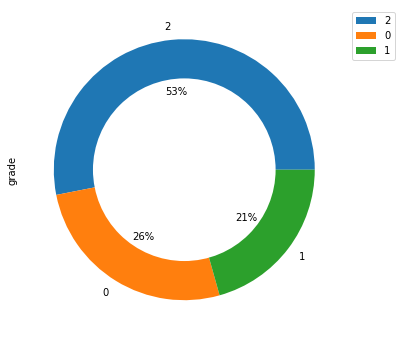

In [6]:
plt.figure(figsize=(10,6))
df['grade'].value_counts().plot.pie(autopct='%2.f%%')
center = plt.Circle((0,0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt. show()

<B span style="color: red; font-size: 30px;" >Data Cleaning</span>

<B span style="color: purple; font-size: 20px;" >Drop Unnecessary Columns</span>

In [7]:
df.drop('id_question', axis=1, inplace=True)

<B span style="color: purple; font-size: 20px;" >Drop Missing and Dublication Values</span>

In [8]:
df.dropna(inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print(f'Number of Rows : {df.shape[0]}')
print(f'Number of Columns : {df.shape[1]}')

Number of Rows : 855
Number of Columns : 2


In [11]:
df.head()

,stu_answer,grade
0,ز,0
1,جبرائيل,1
2,جبريل,2
3,جبريل عليه السلام,2
4,سيدنا جبريل عليه السلام,2


In [12]:
#analyze the total length of each message
df['length'] = df['stu_answer'].apply(len)
df.head()

,stu_answer,grade,length
0,ز,0,1
1,جبرائيل,1,7
2,جبريل,2,5
3,جبريل عليه السلام,2,17
4,سيدنا جبريل عليه السلام,2,23


In [13]:
df['length'].max()

311

In [14]:
# print(stopwords.words('arabic'))

In [15]:
# print(string.punctuation)

<B span style="color: red; font-size: 30px;" >Data Pre-Preocessing</span>

In [16]:
def txt_preprocess(text):
    
    stpword = stopwords.words('arabic')
    
    #check if there are any punctuation
    nopunc = [char for char in text if char not in string.punctuation]

    #join the chars
    nopunc = ''.join(nopunc)
    
    #remove any stopwords
    clean_stopwords = [word for word in nopunc.split() if word not in stpword]
    clean_words = ""
    
    #stemming
    for x in clean_stopwords:
        stemmer = ISRIStemmer()
        clean_words += (stemmer.stem(x)) + " "
        
    return clean_words

In [17]:
df['answer_cleaned'] = df['stu_answer'].apply(txt_preprocess)

In [18]:
df.head(20)

,stu_answer,grade,length,answer_cleaned
0,ز,0,1,
1,جبرائيل,1,7,جبرائيل
2,جبريل,2,5,جبريل
3,جبريل عليه السلام,2,17,جبريل سلم
4,سيدنا جبريل عليه السلام,2,23,سيد جبريل سلم
5,جبريل عليه السلام\n,2,19,جبريل سلم
6,إسم الملك الذي جاء بالوحي إلى رسول الله صلى ال...,2,79,اسم ملك جاء وحي رسل الل صلى الل سلم جبريل سلم
19,سيدنا جبريل,2,11,سيد جبريل
20,جبريل عليه السلام\n,2,18,جبريل سلم
21,اسم الملك المكلف بالوحي هو جبريل عليه السلام,2,45,اسم ملك كلف وحي جبريل سلم


<B span style="color: red; font-size: 30px;" >Text Representation and Build Model</span>

In [184]:
max_fatures = 300
max_len = 200
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['answer_cleaned'].values)
X = tokenizer.texts_to_sequences(df['answer_cleaned'].values)
X = pad_sequences(X ,max_len )

In [185]:
print(f'Number of Rows : {df.shape[0]}')
print(f'Number of Columns : {df.shape[1]}')

Number of Rows : 855
Number of Columns : 4


In [186]:
y = df['grade']

In [200]:
embed_size = 128
model = Sequential()
model.add(Embedding(max_fatures, embed_size ,input_length = X.shape[1]))
model.add(LSTM(300, dropout=0.3, return_sequences=True))
model.add(LSTM(200, dropout=0.3))
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',metrics = ['accuracy'])

In [201]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.3)
print(X_train.shape)
print(X_test.shape)

(598, 200)
(257, 200)


In [202]:
model.fit(x= X_train, y= Y_train, epochs= 10)

Epoch 1/10
19/19 [==============================] - 133s 4s/step - loss: 1.0765 - accuracy: 0.4331
Epoch 2/10
19/19 [==============================] - 65s 3s/step - loss: 1.0290 - accuracy: 0.4582
Epoch 3/10
19/19 [==============================] - 61s 3s/step - loss: 0.9211 - accuracy: 0.5318
Epoch 4/10
19/19 [==============================] - 78s 4s/step - loss: 0.8186 - accuracy: 0.6589
Epoch 5/10
19/19 [==============================] - 52s 3s/step - loss: 0.7054 - accuracy: 0.7140
Epoch 6/10
19/19 [==============================] - 47s 3s/step - loss: 0.5642 - accuracy: 0.7525
Epoch 7/10
19/19 [==============================] - 62s 3s/step - loss: 0.5429 - accuracy: 0.7943
Epoch 8/10
19/19 [==============================] - 79s 4s/step - loss: 0.4717 - accuracy: 0.8010
Epoch 9/10
19/19 [==============================] - 64s 3s/step - loss: 0.4311 - accuracy: 0.8227
Epoch 10/10
19/19 [==============================] - 46s 2s/step - loss: 0.4108 - accuracy: 0.8344


<B span style="color: red; font-size: 30px;" >Evaluate Model</span>

In [204]:
loss , acc = model.evaluate(X_test, Y_test, verbose= 2)

9/9 - 12s - loss: 1.1994 - accuracy: 0.7082 - 12s/epoch - 1s/step


In [205]:
loss

1.199360728263855

In [206]:
acc

0.7081711888313293

In [209]:
Y_pred = model.predict(X_test)
y_prediction_labels = [np.argmax(i) for i in Y_pred]
pd.DataFrame({"Y_test": Y_test , "Y_predicted" : y_prediction_labels})

9/9 [==============================] - 13s 1s/step


,Y_test,Y_predicted
265,1,0
335,2,2
580,0,0
718,0,1
773,0,0
...,...,...
313,2,2
430,0,2
81,1,1
595,0,0


<B span style="color: red; font-size: 30px;" >Test Model</span>

In [213]:
i=1
while True:
    print("امتحان تربيه دينيه اسلاميه")
    ask = input(f"سؤال {i} : ")
    answer = input('الاجابه: ')
    i+=1
    process = txt_preprocess(answer)
    data = tokenizer.texts_to_sequences([process])
    test = pad_sequences(data, maxlen=320,  value=0)
    predicted_ques = model.predict(test)[0]

    labels=['Zero', 'One', 'Two']
    max_prob = np.argmax(predicted_ques)
    print(f'Grade of Answer Is : {labels[max_prob]}')
    
    exit = int(input("Enter Zero To Exit From System  OR One To Run The Program : \n"))
    if exit == 0:
        print('Exit From System...','Thank You')
        break
    else:
        continue   
        print('\n')


امتحان تربيه دينيه اسلاميه
سؤال 1 : كيف كانت الدعوة ؟
الاجابه: كانت سريه لمده 3 سنوات
1/1 [==============================] - 1s 516ms/step
Grade of Answer Is : Two
Enter Zero To Exit From System  OR One To Run The Program : 
1
امتحان تربيه دينيه اسلاميه
سؤال 2 : كيف واجه سيدنا محمد اذي قومه له ؟
الاجابه: واجهم بصبر
1/1 [==============================] - 1s 516ms/step
Grade of Answer Is : One
Enter Zero To Exit From System  OR One To Run The Program : 
1
امتحان تربيه دينيه اسلاميه
سؤال 3 : كيف واجه سيدنا محمد اذي قومه له ؟
الاجابه: صبر
1/1 [==============================] - 1s 776ms/step
Grade of Answer Is : Zero
Enter Zero To Exit From System  OR One To Run The Program : 
1
امتحان تربيه دينيه اسلاميه
سؤال 4 : ما أول ما نزل من القرآن الكريم على سيدنا محمد؟
الاجابه: إقرأ سورة العلق
1/1 [==============================] - 1s 531ms/step
Grade of Answer Is : Two
Enter Zero To Exit From System  OR One To Run The Program : 
1
امتحان تربيه دينيه اسلاميه
سؤال 5 : ما إسم الملك الذي جاء بالوحي إلى

In [ ]:
tf.keras.models.save_model(model,'model.h5')